머신러닝응용1 에서는 train 데이터에서 숫자형 피처만 추출해서 학습함.

<피처 엔지니어링 해보자>

In [160]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "titanic/train.csv")
test = pd.read_csv(drive_path + "titanic/test.csv")
submission = pd.read_csv(drive_path + "titanic/submission.csv")
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [162]:
#데이터 결합
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis =0 )

피처 하나씩 살펴보면서 모델 학습에 맞도록 전처리를 하자

Survived

In [163]:
#타깃 레이블의 분포 확인
train['Survived'].value_counts(dropna=False) #결측값 포함하고 싶으면 dropna = False

0    549
1    342
Name: Survived, dtype: int64

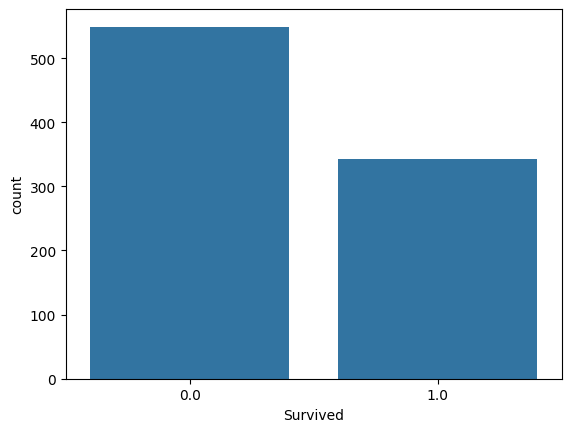

In [164]:
#객실 등급별 분포 확인
sns.countplot(x='Survived', data = data[data['TrainSplit']=='Train'] )
plt.show()

Pclass: 객실 등급

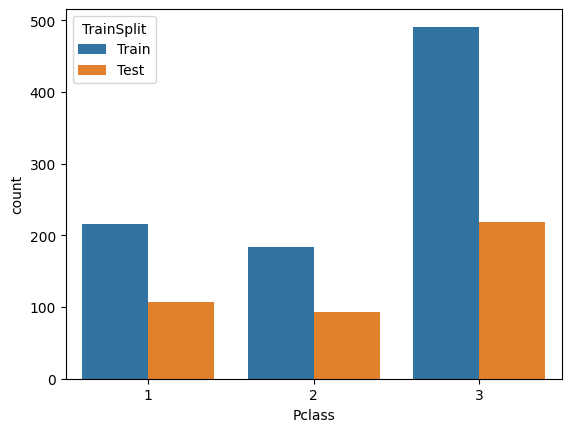

In [165]:
#train - test 데이터 분포
sns.countplot(x='Pclass', hue = 'TrainSplit', data =data)
plt.show()

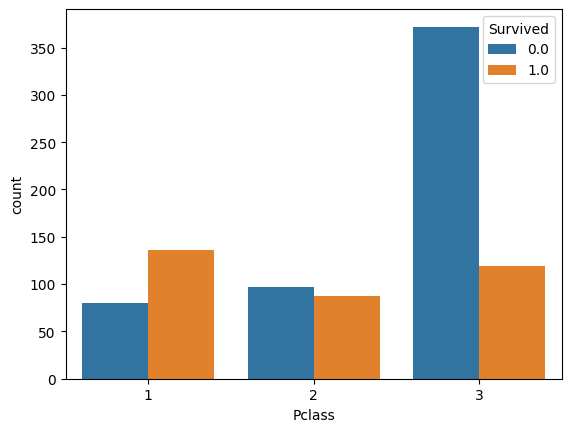

In [166]:
#Pclass 별 survived 여부
sns.countplot(x='Pclass',hue='Survived',data = data[data['TrainSplit']=='Train' ])
plt.show()

#1등석 승객의 생존율 높고 3등석 생존율 낮다.

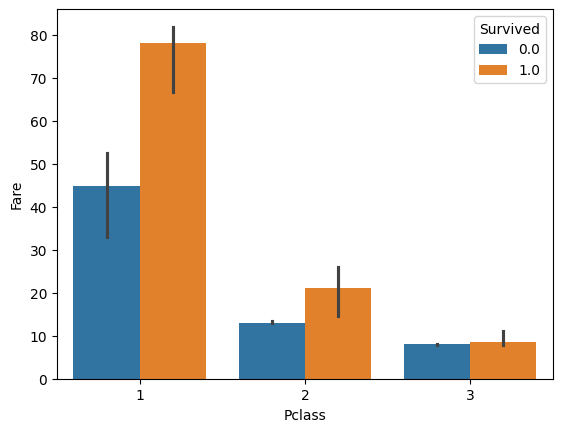

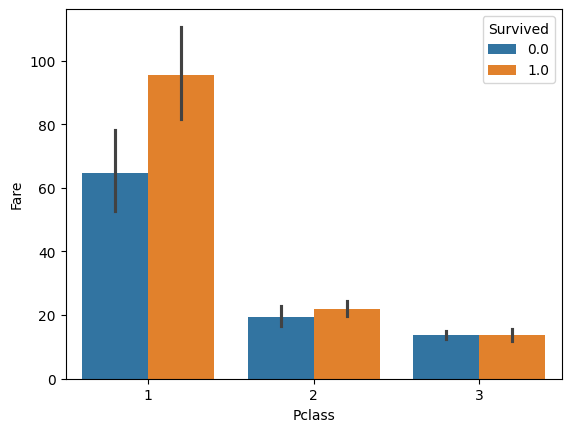

In [167]:
#Pclass별 Fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass', y='Fare',hue='Survived',data = data[data['TrainSplit']=='Train'], estimator=np.median )
plt.show()

#Pclass별 Fare 객실 요금의 평균 비교
sns.barplot(x='Pclass', y='Fare',hue='Survived',data = data[data['TrainSplit']=='Train'], estimator=np.mean )
plt.show()


Sex: 성별

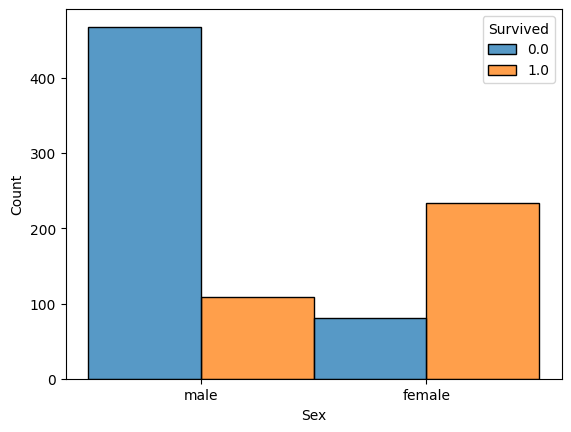

In [168]:
#histplot 함수 - dodge 옵션
sns.histplot(x='Sex',hue='Survived',multiple='dodge',data = data[data['TrainSplit'] == 'Train'])
plt.show()

#남자 보다 여자의 생존율이 더 높다

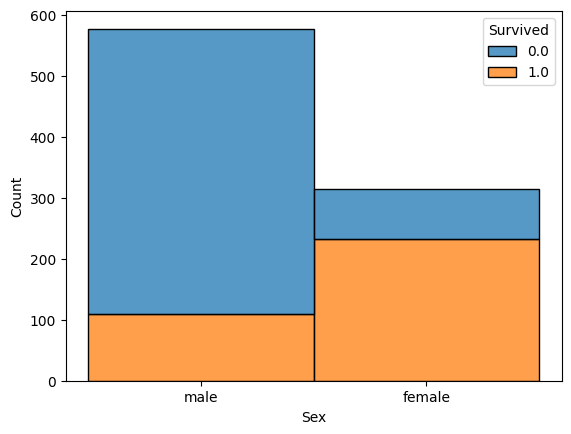

In [169]:
#histplot 함수 - stack옵션
sns.histplot(x='Sex', hue='Survived',multiple = 'stack',data = data[data['TrainSplit']=='Train'])
plt.show()

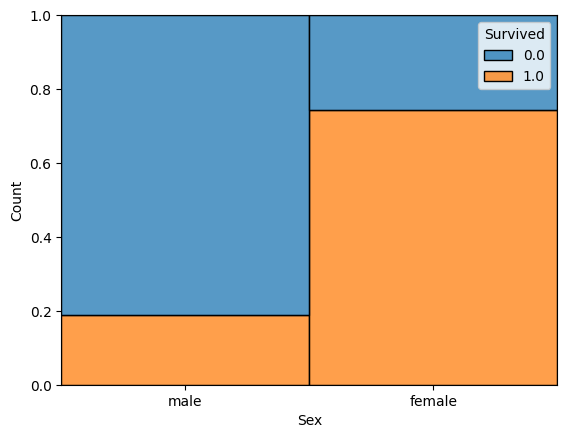

In [170]:
#histplot 함수 - fill 옵션 (백분율)
sns.histplot(x='Sex',hue='Survived',multiple='fill',data = data[data['TrainSplit']=='Train'])
plt.show()

머신러닝 모델은 'female', 'male'등 문자열 데이터를 그대로 학습에 사용할 수 없다.

따라서, 숫자형 데이터로 변환하는 작업이 필요하다.

In [171]:
#레이블 인코딩(female:0, male:1)
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

#성별 분포 확인
data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

Name: 이름

In [172]:
data['Name'].unique() #고유값 확인

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [173]:
#str 속성을 적용하면 문자열을 직접 추출가능

title_name = data['Name'].str.split(",", expand = True)[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [174]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [175]:
#비슷한 속성을 가진 타이틀을 같은 그룹으로 묶자.
title = title.replace(['Ms'],'Miss' )
title = title.replace(['Mlle','the Countess','Lady','Don','Dona','Mme','Sir','Jonkheer'],'Noble')
title = title.replace(['Col','Major','Capt'],'Officer')
title = title.replace(['Dr','Rev'],'Priest')

data['Title'] = np.array(title)
data['Title'].value_counts(dropna = False)

#안묶였네.. 왜 그러지?

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Title, dtype: int64

In [176]:
#승객 나이와 생존 여부와의 관계
#sns.violinplot(x='Title',y='Age',hue='Survived',data = data)
#plt.show()

In [177]:
#Name 열 삭제
data = data.drop('Name', axis = 1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

Age: 나이

In [178]:
data['Title'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object

In [179]:
#결측값 확인 및 대체
for title in data['Title'].unique():
  #결측값 개수 확인
  print("%s 결측값 개수: "%title,  data.loc[data['Title']==title,'Age'].isnull().sum())
  #각 title의 중간값으로 대체
  age_med = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title,'Age'] = data.loc[data['Title']==title,'Age'].fillna(age_med)
print("\n")
print("Age열의 결측값 개수: ", data['Age'].isnull().sum())


 Mr 결측값 개수:  176
 Mrs 결측값 개수:  27
 Miss 결측값 개수:  50
 Master 결측값 개수:  8
 Don 결측값 개수:  0
 Rev 결측값 개수:  0
 Dr 결측값 개수:  1
 Mme 결측값 개수:  0
 Ms 결측값 개수:  1
 Major 결측값 개수:  0
 Lady 결측값 개수:  0
 Sir 결측값 개수:  0
 Mlle 결측값 개수:  0
 Col 결측값 개수:  0
 Capt 결측값 개수:  0
 the Countess 결측값 개수:  0
 Jonkheer 결측값 개수:  0
 Dona 결측값 개수:  0


Age열의 결측값 개수:  0


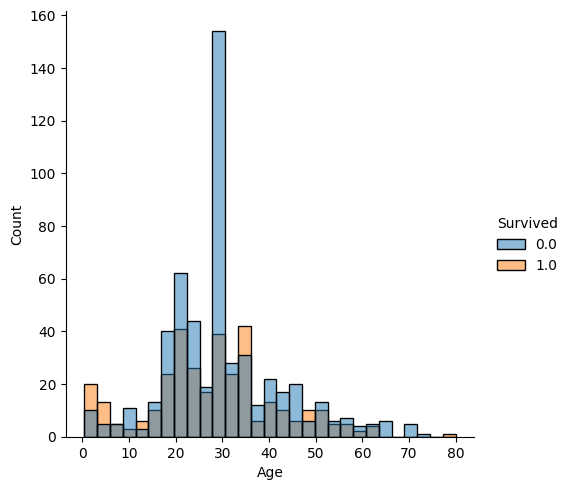

In [180]:
#Age분포
sns.displot(x='Age',kind = 'hist', hue='Survived',data= data[data['TrainSplit']=='Train' ])
plt.show()

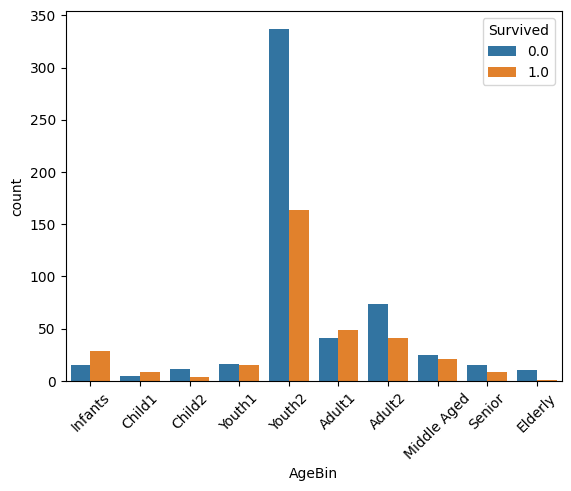

In [181]:
#Binning기법
#나이에 따라 생존율에 차이가 나기 때문에 앞의 히스토그램 분포를 기준으로 Age열의 데이터를 여러 개의 구간으로 나누자

bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['Infants','Child1','Child2', 'Youth1','Youth2','Adult1','Adult2','Middle Aged','Senior','Elderly']
data['AgeBin'] = pd.cut(data['Age'],bins=bins, labels= labels)

#Age_bin 에 따른 생존율 비교
sns.countplot(x= 'AgeBin', hue ='Survived', data = data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

SibSp: 형제자매/배우자

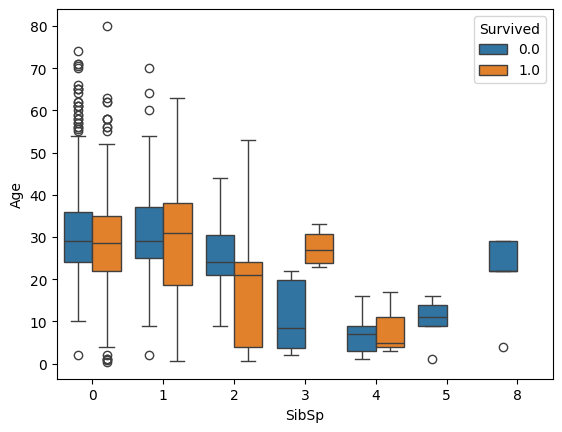

In [182]:
#형제자매/배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp',y='Age',hue= 'Survived',data = data[data['TrainSplit']=='Train'])
plt.show()

Parch:부모/자식

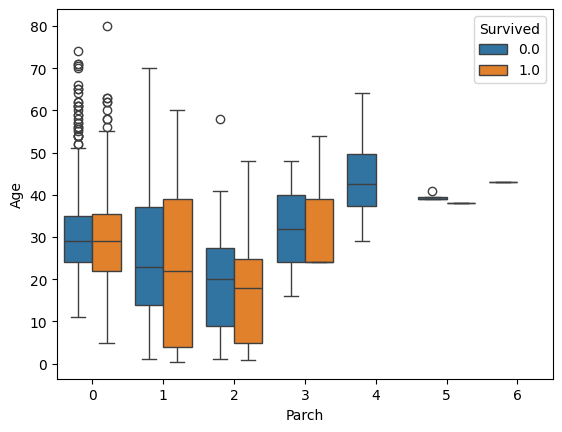

In [183]:
sns.boxplot(x='Parch',y='Age',hue='Survived', data = data[data['TrainSplit']=='Train'])
plt.show()

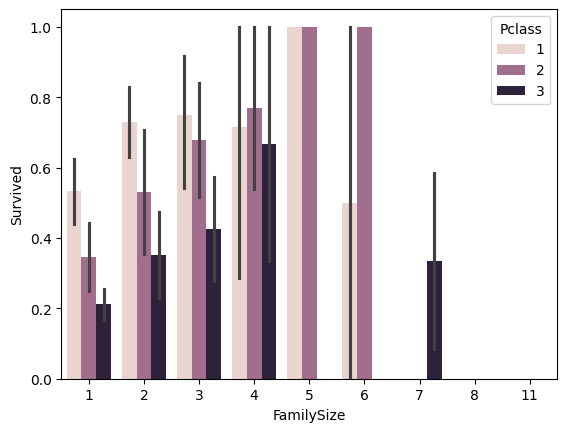

In [184]:
#SibSp 열 Parch열의 데이터를 더하면 함께 탑승한 모든 가족의 수를 계산할 수 있다.
#이를 토대로 가족 수와 객실 등급을 기준으로 생존율의 차이를 확인 가능
#가족 수에 따라 객실 등급에 따른 생존율에 차이가 있음을 알 수 있다.

#가족 구성원의 수
data['FamilySize'] = data['SibSp'] + data['Parch'] +1
#가족 구성원의 수와 생존율 관계
sns.barplot(x='FamilySize',y='Survived',hue='Pclass',estimator=np.mean, data = data[data['TrainSplit']=='Train' ])
plt.show()


Fare 요금

In [185]:
data.loc[data['Fare'].isnull(),:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [186]:
#3등석 요금과 객실 등급의 상관관계가 높기 때문에 3등석 객실 승객의 탑승 요금의 평균값을 이용하여 결측값을 채워주자
p3_fare_mean = data.loc[data['Pclass']==3,'Fare'].mean()
print(p3_fare_mean)

data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044,:'Fare']

13.302888700564973


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


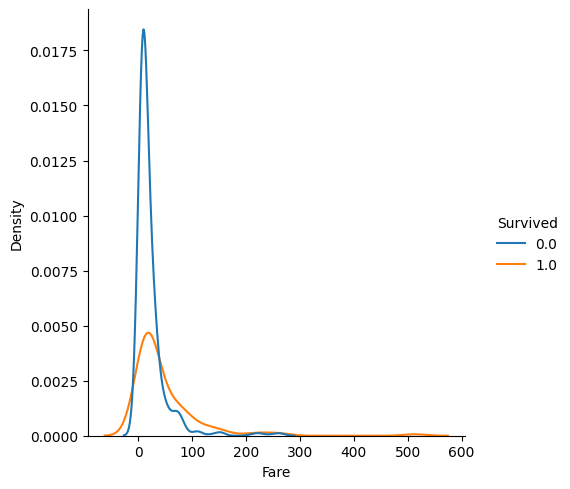

In [187]:
#fare분포
sns.displot(x='Fare',kind='kde',hue='Survived', data = data[ data['TrainSplit']=='Train' ])
plt.show()

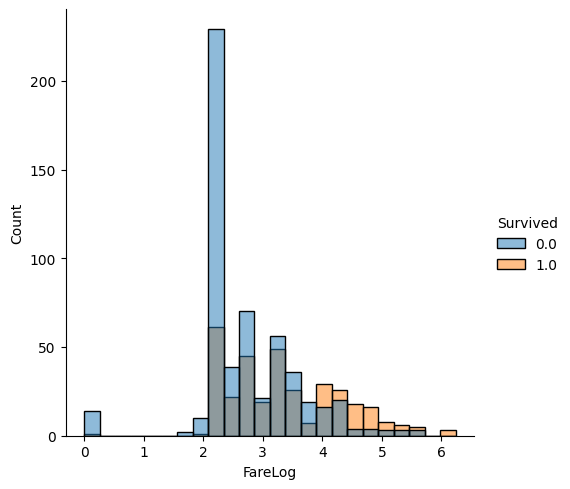

In [188]:
#비대칭 분포를 정규화하기 위해 로그 변환을 한다.
#넘파이 log1p 함수를 이용하여 fare열의 데이터에 로그를 취하면, 다음과 같이 정규분포와 가까운 형태로 변환된다.
#단, 요금이 낮은 쪽으로 데이터가 비어있는 구간이 있다는 사실도 알 수 있다.

data['FareLog'] = np.log1p(data['Fare'])
sns.displot(x='FareLog',kind='hist',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

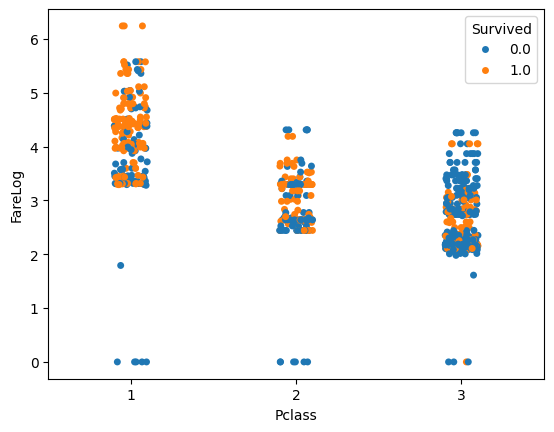

In [189]:
sns.stripplot(x='Pclass',y='FareLog',hue='Survived',data = data[data['TrainSplit']=='Train'])
plt.show()

Embarked 탑승항구

In [190]:
data.loc[data['Embarked'].isnull(),: ]  #결측값 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [191]:
#탑승 장소를 확인할 수 있는 방법이 뚜렷하지 않기 때문에 가장 탑승자가 많은 항구인 'S'값으로 결측값을 채우자

#최빈값을 이용한 결측값 처리
print("Embarked 열의 최빈값: ",data['Embarked'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Embarked 열의 최빈값:  S


S    916
C    270
Q    123
Name: Embarked, dtype: int64

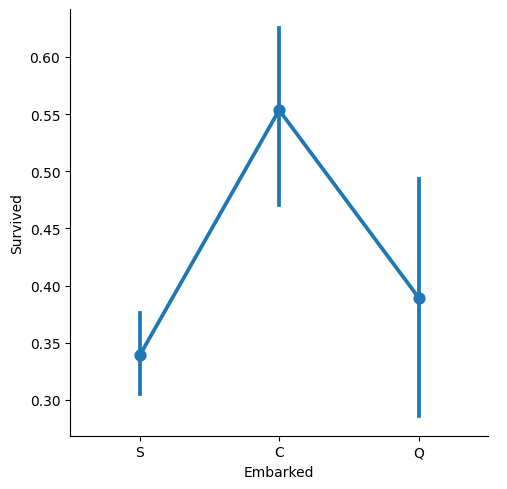

In [192]:
sns.catplot(x='Embarked',y='Survived',kind='point',data=data[data['TrainSplit']=='Train' ])
plt.show()

Cabin: 객실 구역

In [193]:
#고유값 확인
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [194]:
#문자열 추출하고 slice함수로 문자열의 첫 글자만 선택
#결측값이 1014개로 많은 편인데 이 경우 열 전체를 삭제하여 모델 학습에서 제외하는 경우가 ㅁㄴ하다.
#여기서는 삭제하지 말고 유의미한 속성인지 추가적으로 확인해보자

#첫 번째 알파벳 이니셜 추출
data['Cabin'].str.slice(0,1).value_counts(dropna=False)


NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

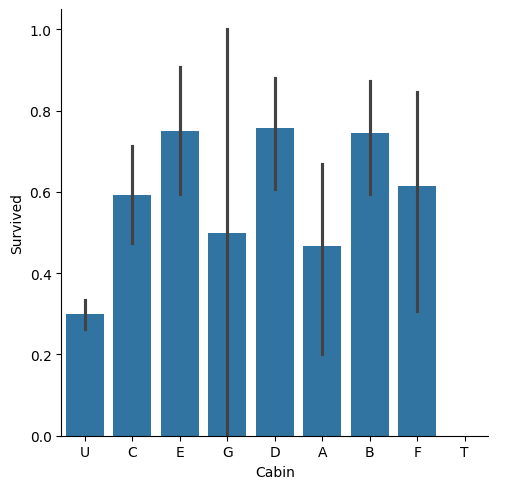

In [195]:
#결측값을 U로 대체하자.
#생존율을 그래프로 그리면 구역 별로 차이가 있다. 특히 객실 구역 데이터가 없어서 결측값으로 분류된 U의 경우 생존율이 가장 낮게 나타난다.

data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna('U')

#Cabin 구역별 생존율 비교
sns.catplot(x='Cabin',y='Survived',kind='bar',data= data[data['TrainSplit']=='Train'])
plt.show()

티켓 탑승권

In [196]:
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [197]:
#알파벳과 숫자가 결합된 형태이다.
#숫자로만 이루어진 데이터도 많이 존재

#알파벳 부분만 따로 추출해서 정리하자
data['Ticket']=data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

<ipython-input-197-4a727027b448>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Ticket']=data['Ticket'].str.replace(".","").str.replace("/","")


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

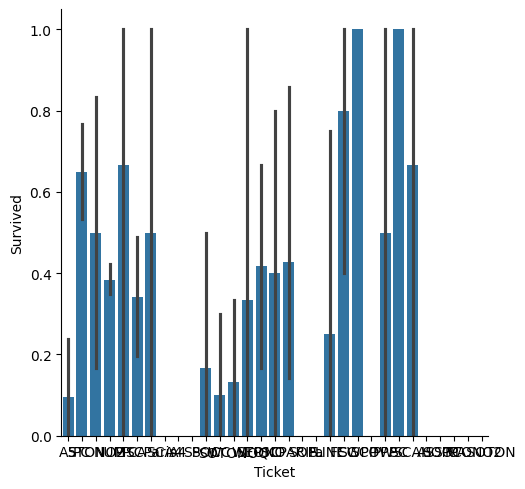

In [198]:
#숫자로만 이루어진 데이터를 NUM으로 치환하자.
#탑승권 번호를 기준으로 생존율에 차이가 존재하므로 모델 학습에 사용할만큼 유의미한 피처라고 볼 수 있다.

#문자열이 숫자인 경우 Num으로 대체
data.loc[data['Ticket'].str.isdigit(),'Ticket'] = 'NUM'
data['Ticket'].value_counts(dropna=False)

#티켓 번호별 생준율 비교
sns.catplot(x='Ticket',y='Survived', kind = 'bar',data = data[data['TrainSplit']=='Train'])
plt.show()

데이터 전처리

In [199]:
#레이블 인코딩  -문자열 데이터를 숫자형 데이터로 변환하는 방법
#각 열에 속하는 범주의 개수만큼 숫자 레이블로 변환

from sklearn.preprocessing import LabelEncoder
for col in ['Title','AgeBin']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

data.loc[:,['Title','AgeBin']].head()

,Title,AgeBin
0,12,9
1,13,1
2,9,9
3,13,0
4,12,0


In [200]:
#원핫 인코딩
#하나의 열을 범주 개수만큼 열을 분할하여 범주에 해당하는 열에는 1을 입력하고 나머지 열에는 0을 입력

onehot_prefix=[]
for col in ['Embarked','Cabin','Ticket']:
  data[col] = data[col].astype('category')
  data = pd.get_dummies(data, columns = [col], prefix=col[:3], drop_first = True)
  onehot_prefix.append(col[:3])

data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix ] ].head()

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


피처 스케일링

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()  #0~1 범위로 정규화처리

scaled_cols = [col for col in data.loc[:,'Pclass':].columns if col!='TrainSplit']

data_scaled = data.loc[:,scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

data.loc[:,scaled_cols] = data_scaled[:,:]
data.head()


<ipython-input-201-fe5d11dd993d>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,scaled_cols] = data_scaled[:,:]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,Train,0.705882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,Train,0.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,Train,0.529412,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,Train,0.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,Train,0.705882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


모델 학습

In [202]:
selected_features =['Pclass', 'Sex','SibSp','Parch',
                    'Title','AgeBin','FamilySize','FareLog',
                    'Emb_Q','Emb_S','Cab_B','Cab_C','Cab_D','Cab_E','Cab_F','Cab_G']  #더 있음..

In [203]:
y_train = data.loc[data['TrainSplit']=='Train','Survived']
X_train = data.loc[data['TrainSplit']=='Train', selected_features]
X_test = data.loc[data['TrainSplit']=='Test', selected_features]



In [204]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr,y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=True,random_state=20)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)


(712, 16) (712,)
(179, 16) (179,)


In [205]:
#로지스틱 회귀 모델로 훈련하고 검증 데이터와 정확도 비교해보자
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

lr_model = LogisticRegression()
lr_model.fit(X_tr,y_tr)

y_tr_pred=lr_model.predict(X_tr)
print("훈련 acc:%.4f"%accuracy_score(y_tr,y_tr_pred))
print("훈련 AUC: %.4f"%roc_auc_score(y_tr,y_tr_pred))

y_val_pred = lr_model.predict(X_val)
print("훈련 acc:%.4f"%accuracy_score(y_val,y_val_pred))
print("훈련 AUC: %.4f"%roc_auc_score(y_val,y_val_pred))


훈련 acc:0.7837
훈련 AUC: 0.7712
훈련 acc:0.8380
훈련 AUC: 0.8106


In [206]:
#예측값을 제출 파일 양식의 survived열에 입력하자
y_test_pred = lr_model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)
submission_file_path = drive_path + 'baseline_lr_submission_001.csv'
submission.to_csv(submission_file_path, index=False)



In [216]:
#랜덤 포레스트 모델로 분류하고 5-fold 교차 검증으로 auc스코어 확인
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=2020)

from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수: ", np.round(auc_scores, 4))
print("평균 AUC 점수: ", np.round(np.mean(auc_scores),4))



개별 Fold의 AUC 점수:  [0.8415 0.8228 0.8646 0.8538 0.8642]
평균 AUC 점수:  0.8494


In [211]:
#제출 파일
rf_model.fit(X_train,y_train)
y_test_pred = rf_model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_rf_submission_001.csv'
submission.to_csv(submission_filepath, index=False)

피처 중요도

피처:  ['FareLog', 'Sex', 'Title', 'Pclass', 'AgeBin', 'FamilySize', 'SibSp', 'Emb_S', 'Parch', 'Cab_E', 'Cab_D', 'Cab_C', 'Emb_Q', 'Cab_B', 'Cab_F', 'Cab_G']
중요도:  [0.2736560909755716, 0.21051932753963115, 0.1316039226952804, 0.08674926423731202, 0.08458421120882517, 0.06120577083867842, 0.03726548591750644, 0.026045711305636307, 0.023753673617536043, 0.01552917397002985, 0.012562337602666129, 0.011852573310165824, 0.009882839378299315, 0.009570104051740162, 0.003018312595367059, 0.002201200755754186]


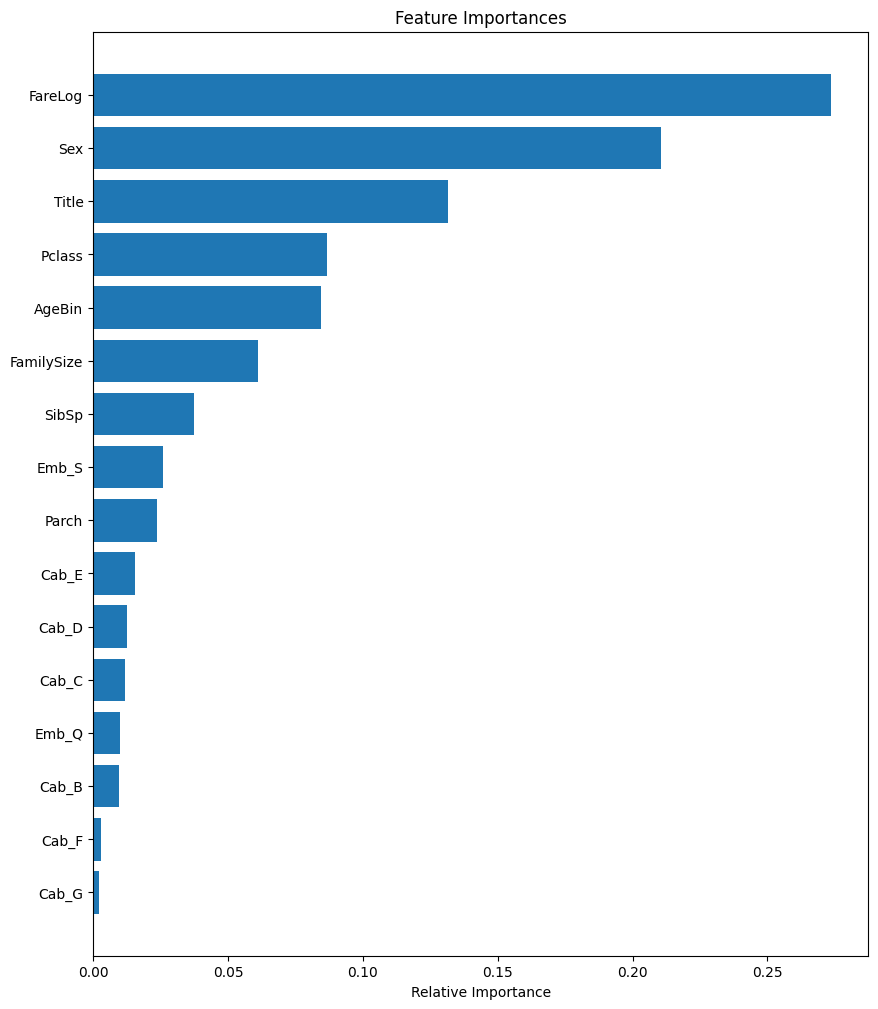

In [212]:
#tree 계열 알고리즘의 feature importance 그래프
def plot_importance(model, features):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = [features[i] for i in indices]
  feature_imp = importances[indices]

  plt.figure(figsize=(10,12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)),feature_imp, align='center')
  plt.yticks(range(len(indices)),feature_names )
  plt.xlabel('Relative Importance')

  print('피처: ',list(reversed(feature_names)))
  print("중요도: ",list(reversed(feature_imp)))

  return list(reversed(feature_names) ), list(reversed(feature_imp))
imp_features, imp_scores = plot_importance(rf_model, selected_features)

In [218]:
#상위 10개만 피처로 선택
selected_features = imp_features[:10]
y_train = data.loc[data['TrainSplit']=='Train','Survived' ]
X_train = data.loc[data['TrainSplit']=='Train', selected_features ]
X_test = data.loc[data['TrainSplit']=='Test', selected_features]

In [220]:
#랜덤 포레스트
rf_model = RandomForestClassifier(random_state=2020)
auc_scores = cross_val_score(rf_model, X_train, y_train,cv=5, scoring='roc_auc')
print("개별 Fold AUC 점수: ", np.round(auc_scores,4))
print("평균 AUC 점수: ", np.round(np.mean(auc_scores),4))

rf_model.fit(X_train,y_train)
y_test_pred = rf_model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_rf_submission_002.csv'
submission.to_csv(submission_filepath, index=False)


개별 Fold AUC 점수:  [0.8499 0.7994 0.8975 0.8328 0.8788]
평균 AUC 점수:  0.8517


In [223]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, random_state=2020)
auc_scores = cross_val_score(xgb_model, X_train,y_train, cv=3, scoring = 'roc_auc')
print(np.round(auc_scores,4))
print(np.round(np.mean(auc_scores),4))

xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_xgb_submission_001.csv'
submission.to_csv(submission_filepath, index= False)

[0.8275 0.8866 0.8729]
0.8623


분류 확률값

In [224]:
#확률값 예측
y_xgb_proba = xgb_model.predict_proba(X_test)[:,1]
y_rf_proba = rf_model.predict_proba(X_test)[:,1]

#앙상블 기법
y_proba = (y_xgb_proba + y_rf_proba) / 2
submission['Survived'] = y_proba
submission_filepath = drive_path + 'baseline_proba_submission_001.csv'
submission.to_csv(submission_filepath, index = False)